In [2]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
import json

/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_90405/940581749.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
filename = "master.csv"

In [4]:
import json
import pandas as pd


In [76]:

#create individual files

df = pd.DataFrame(pd.read_csv("master.csv")) 

for song in list(set(df['sound'])):
    newdf = df[df['sound'] == f"{song}"]
    newdf.to_csv(f'{song}.csv', index=False)

In [5]:
def makeTS(filename):
    df = pd.read_csv(filename)

    newlist = []
    
    for row in df['video_timestamp']:
        timestamp = str(row).split("T")
        newlist.append(" ".join(timestamp))
    df['video_timestamp_new'] = newlist

    dates = pd.to_datetime(df['video_timestamp_new'], errors='coerce')
    df.dropna(subset=['video_timestamp_new'], inplace=True)

    df = df.iloc[:len(df['video_timestamp_new'])]
    
    ts = Series(list(df['video_playcount']), index=dates)

    return ts

def makeSubplot(ts,period,axs,ax,color,label):
    watches = ts.resample(period).count()
    
    if period =='W':
        time = 'week'
    elif period == 'M':
        time = 'month'
    elif period == 'D':
        time = 'day' 
        
    axs[ax].plot(watches.index,watches,color=color, label=label)
    
def makePlot(data,period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10,len(data)*2))
    
    for i in range(len(data)):
        filename = data[i]
        ts = makeTS(filename)
        color = plt.cm.viridis(i / len(data))  # Generate color based on position
        label = filename[8:-5]
        makeSubplot(ts,period,axs,i,color,label)
        
        axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        

    plt.tight_layout()
    plt.show()

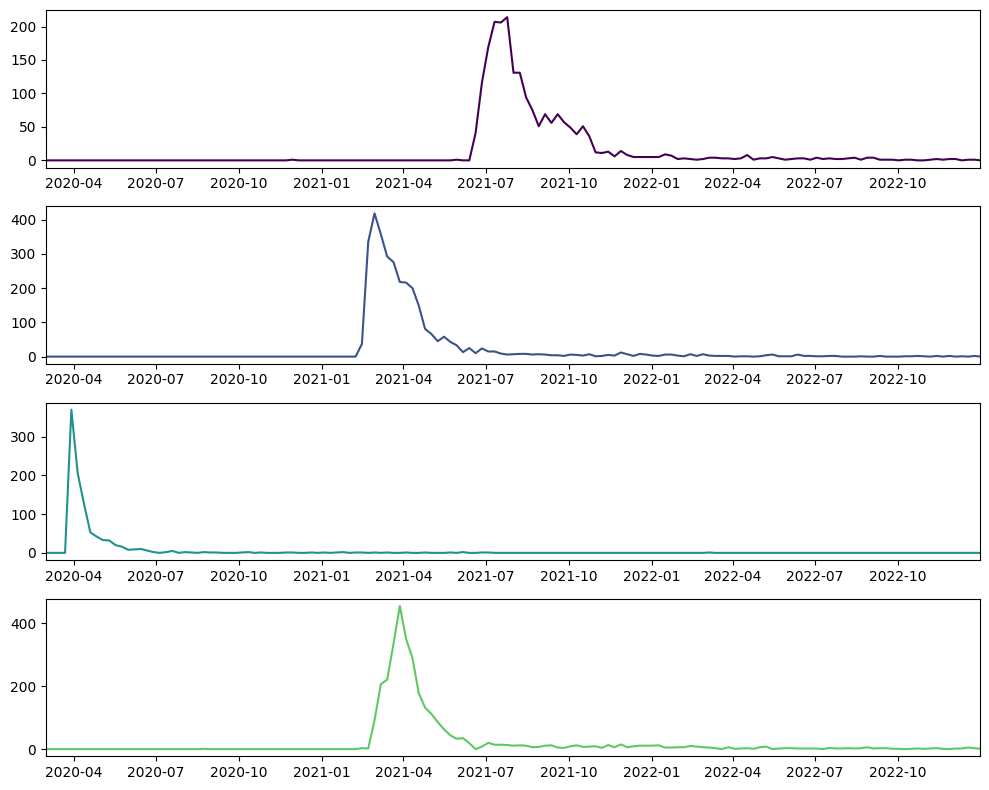

In [6]:
data = ['fancylike.csv', 'heartbreak.csv', 'savage.csv', 'up.csv']
#data = ['fancylike.csv', 'heartbreak.csv', 'savage.csv', 'up.csv',
#        'conceited.csv', 'nowahala.csv', 'sweaterweather.csv',
#        'dropittothefloor.csv', 'itgirl.csv', 'mwahmwah.csv', 'thisyear.csv', 'watertyla.csv',
#        'bam.csv', 'flomilli.csv', 'glo.csv', 'tyla.csv', 'wannabe.csv']

makePlot(data,'W')

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def makeTS(filename):
    df = pd.read_csv(filename)

    newlist = []
    
    for row in df['video_timestamp']:
        timestamp = str(row).split("T")
        newlist.append(" ".join(timestamp))
    df['video_timestamp_new'] = newlist

    dates = pd.to_datetime(df['video_timestamp_new'], errors='coerce')
    df.dropna(subset=['video_timestamp_new'], inplace=True)

    df['video_playcount'] = pd.to_numeric(df['video_playcount'], errors='coerce')  # Convert to numeric type
    
    df = df.iloc[:len(df['video_timestamp_new'])]
    
    ts = pd.Series(list(df['video_playcount']), index=dates)

    max_count = ts.max()  # Find the maximum count
    max_timestamp = ts[ts == max_count].index[0]  # Get the timestamp corresponding to the maximum count

    return ts, max_timestamp  # Return both the time series and the timestamp with maximum count

def makeSubplot(ts, period, axs, ax, color, label):
    watches = ts.resample(period).count()
    
    if period == 'W':
        time = 'week'
    elif period == 'M':
        time = 'month'
    elif period == 'D':
        time = 'day' 
        
    axs[ax].plot(watches.index, watches, color=color, label=label)
    
def makePlot(data, period):
    fig, axs = plt.subplots(len(data), 1, figsize=(10, len(data) * 2))
    
    for i in range(len(data)):
        filename = data[i]
        ts, max_timestamp = makeTS(filename)
        color = plt.cm.viridis(i / len(data))  # Generate color based on position
        label = filename[8:-5]
        makeSubplot(ts, period, axs, i, color, label)
        
        #axis for 2021
        axs[i].set_xlim(pd.Timestamp('2020-03-01'), pd.Timestamp('2022-12-31'))
        
        #axis for 2022
        #axs[i].set_xlim(pd.Timestamp('2021-11-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2023
        #axs[i].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2024-05-31'))
        
        #axis for 2024
        #axs[i].set_xlim(pd.Timestamp('2023-08-01'), pd.Timestamp('2024-05-31'))
        
        
        print("Maximum count timestamp for", label, ":", max_timestamp)  # Print the maximum count timestamp

    plt.tight_layout()
    plt.show()


Maximum count timestamp for  : 2021-07-19 23:46:15
Maximum count timestamp for a : 2021-03-01 05:44:58
Maximum count timestamp for  : 2020-03-26 16:54:37
Maximum count timestamp for  : 2021-03-17 20:38:24


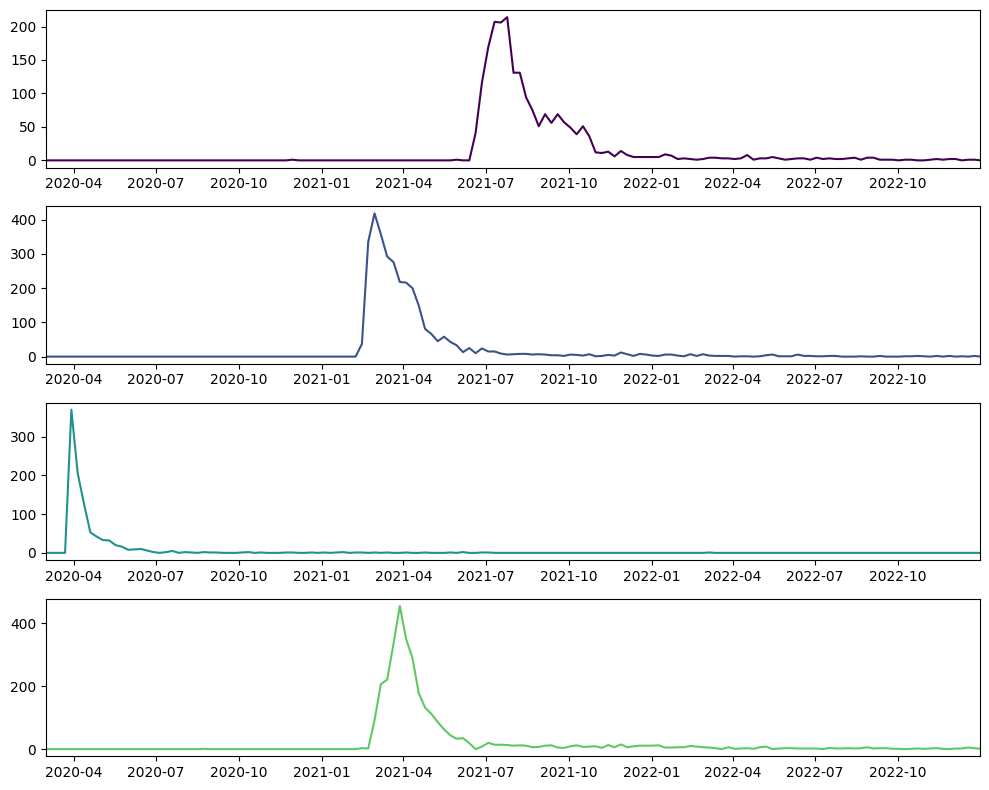

In [10]:
data = ['fancylike.csv', 'heartbreak.csv', 'savage.csv', 'up.csv']
#data = ['fancylike.csv', 'heartbreak.csv', 'savage.csv', 'up.csv',
#        'conceited.csv', 'nowahala.csv', 'sweaterweather.csv',
#        'dropittothefloor.csv', 'itgirl.csv', 'mwahmwah.csv', 'thisyear.csv', 'watertyla.csv',
#        'bam.csv', 'flomilli.csv', 'glo.csv', 'tyla.csv', 'wannabe.csv']

makePlot(data,'W')

In [91]:
#fancy = df[df['video_timestamp_new'].str.contains('2021-07-19')]
#fancy[df['sound']=='fancylike']

#hearbreak = df[df['video_timestamp_new'].str.contains('2021-03-01')]
#hearbreak[df['sound']=='heartbreak']

savage = df[df['video_timestamp_new'].str.contains('2020-03-26')]
savage[df['sound']=='savage']


#up = df[df['video_timestamp_new'].str.contains('2021-03-17')]
#up[df['sound']=='up'].sort_values(by='video_playcount', ascending=False)


/var/folders/zh/lh50ntf51kvdjr8cmpd9y7840000gn/T/ipykernel_88699/77608639.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  savage[df['sound']=='savage']


,sound,year,video_id,video_timestamp,video_duration,video_likecount,video_commentcount,video_sharecount,video_playcount,video_description,suggested_words,author_username,author_name,author_bio,author_followercount,author_likecounts,video_stickers,video_is_ad,video_locationcreated,video_timestamp_new
146,savage,2021.0,6808578988454464774,2020-03-26T14:03:49,12.0,4376.0,217.0,5.0,24600.0,Cupcakes!!🧁#foryou #4u #foryoupage #viralvideo...,NaN,0.wat.heb.je.0,wat.heb.je,hopefully you like the vid and we go virall 💛✨...,4159.0,86800.0,NaN,False,BE,2020-03-26 14:03:49
780,savage,2021.0,6808639001231133958,2020-03-26T17:56:44,15.0,2122.0,26.0,80.0,36900.0,🌞🌞🌞 #fyp #TheSongOfUs #catsoftiktok #foryou #x...,NaN,_margalit.maleh,Margalit.maleh,🐮,116900.0,2000000.0,NaN,False,US,2020-03-26 17:56:44
790,savage,2021.0,6808482072181640454,2020-03-26T07:47:44,15.0,1613.0,4.0,51.0,9946.0,Il mio allenamento per l’addome💪🏻❤️ (poi alcun...,NaN,_marty_bels_,BELS,Link💓,197200.0,10300000.0,NaN,False,IT,2020-03-26 07:47:44
1157,savage,2021.0,6808607000650419461,2020-03-26T15:52:32,15.0,12000.0,112.0,42.0,55800.0,lo intenté 😟🥵 #fyp #xyzcba,NaN,abrilchi8,ABRIL🥷🏼,sígueme en insta bby 😚 @hennings__ 📥 contact...,856300.0,38100000.0,NaN,False,CL,2020-03-26 15:52:32
1194,savage,2021.0,6808728720472280325,2020-03-26T23:44:55,15.0,2126.0,44.0,4.0,10700.0,I’m loosing so many followers and not gaining😒...,NaN,adam_goen,🤘🏻Asl Prince🤘🏻,I have Cerebral Palsy Hard of Hearing Cashapp...,1300000.0,42300000.0,NaN,False,US,2020-03-26 23:44:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27503,savage,2021.0,6808675831402056965,2020-03-26T20:19:39,15.0,5259.0,231.0,12.0,44000.0,Quem conseguiu achar?? Me: simmm || #trend #fo...,NaN,vinixius_,vinixius,Recife-PE 20y @viniciusrmagalhaes vinixius14v...,295300.0,9000000.0,NaN,False,BR,2020-03-26 20:19:39
27818,savage,2021.0,6808653371478674693,2020-03-26T18:52:28,9.0,8064.0,523.0,79.0,23900.0,which playground did you get? everyone go foll...,NaN,what.will.you.get_._,🤍🎄🤍,WE HIT 12.0k! THANK YOU GUYS SO MUCH🎄🤍•yellow ...,11200.0,140000.0,NaN,False,US,2020-03-26 18:52:28
28570,savage,2021.0,6808457949124627717,2020-03-26T06:14:11,14.0,17600.0,216.0,398.0,133000.0,#рекомендации #foryoupage #fyp #dance #forurpa...,NaN,your_geoegy,GEORGE,GEORGE DANCER🕺 8k 🤍❤️💚 🇺🇦 🇺🇦 🇺🇦 INST:your_ge...,6139.0,395700.0,NaN,False,UA,2020-03-26 06:14:11
28699,savage,2021.0,6808461078117223686,2020-03-26T06:26:18,15.0,2955.0,12.0,16.0,19300.0,💘🥶👉🏼👈🏼#viral,NaN,yx.cestmoii,zoë 🖤,2/05/23💫❤️,21500.0,1600000.0,NaN,False,BE,2020-03-26 06:26:18


In [9]:
from collections import Counter

In [25]:
df3 = pd.read_csv("master.csv")

newlist = []
    
for row in df3['video_timestamp']:
    timestamp = str(row).split("T")
    newlist.append(" ".join(timestamp))

df3['video_timestamp_new'] = newlist

dates = pd.to_datetime(df3['video_timestamp_new'], errors='coerce')
df3.dropna(subset=['video_timestamp_new'], inplace=True)

df3 = df3.iloc[:len(df3['video_timestamp_new'])]


sorted_timestamp = sorted(df3['video_timestamp_new'])
print(sorted_timestamp, reversed)


['1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-31 19:00:00', '1969-12-3